In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_data=image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/brain_mri/Training",batch_size=100,\
                                        image_size=(256,256),class_names=["glioma","meningioma","notumor","pituitary"],\
                                        shuffle=True)
test_data=image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/brain_mri/Testing",batch_size=100,\
                                        image_size=(256,256),class_names=["glioma","meningioma","notumor","pituitary"],\
                                        shuffle=True)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
data=train_data.as_numpy_iterator()

In [ ]:
data.next()[0].max()

255.0

In [ ]:
data=data.next()
unique_label=[]
unique_imag=[]
for image,labels in train_data:
  for img,label in zip(image,labels):
      if label not in unique_label:
        unique_imag.append(img)
        unique_label.append(label.numpy())
      if len(unique_label)==4:
        break
  if len(unique_label)==4:
    break

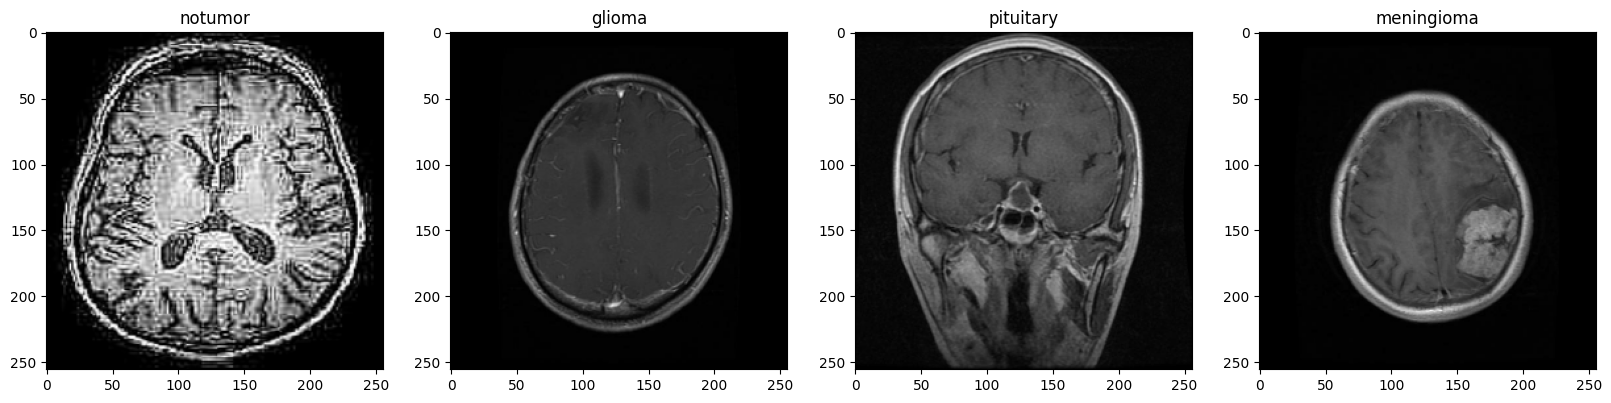

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,20))
for idx,img in enumerate(unique_imag):
  ax[idx].imshow(img.numpy().astype("uint8"))
  ax[idx].title.set_text(train_data.class_names[unique_label[idx]])

In [ ]:
train_data=train_data.map(lambda x,y: (x/255.0,y))
test_data=test_data.map(lambda x,y: (x/255.0,y))

In [ ]:
model = Sequential([

    # Convolutional layer 1
    Conv2D(32, (4, 4), activation="relu", input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 2
    Conv2D(64, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 3
    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 4
    Conv2D(128, (4, 4), activation="relu"),
    Flatten(),

    # Full connect layers
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

model.summary()

optimizer = Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_data,epochs=30)

NameError: name 'Sequential' is not defined

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
checkpoint_callback = ModelCheckpoint(
    filepath='/kaggle/working/brain.keras',  # File path to save the model
    save_best_only=True,  # Only save the model if it is the best seen so far
    monitor='accuracy',  # Monitor the validation loss
    mode='min',  # Minimize the validation loss
    verbose=1  # Verbosity mode
)
early_stopping_callback = EarlyStopping(
    monitor='accuracy',  # Monitor the validation loss
    patience=2,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Verbosity mode
    mode='min'  # Minimize the validation loss
)
callbacks = [checkpoint_callback, early_stopping_callback]

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.fit(train_data,epochs=20)

Epoch 1/20
58/58 [==============================] - 29s 347ms/step - loss: 0.9614 - accuracy: 0.5786
Epoch 2/20
58/58 [==============================] - 24s 370ms/step - loss: 0.6345 - accuracy: 0.7609
Epoch 3/20
58/58 [==============================] - 23s 347ms/step - loss: 0.5136 - accuracy: 0.8132
Epoch 4/20
58/58 [==============================] - 26s 377ms/step - loss: 0.4403 - accuracy: 0.8377
Epoch 5/20
58/58 [==============================] - 24s 371ms/step - loss: 0.3922 - accuracy: 0.8596
Epoch 6/20
58/58 [==============================] - 24s 373ms/step - loss: 0.3623 - accuracy: 0.8678
Epoch 7/20
58/58 [==============================] - 22s 338ms/step - loss: 0.3428 - accuracy: 0.8810
Epoch 8/20
58/58 [==============================] - 24s 345ms/step - loss: 0.3060 - accuracy: 0.8909
Epoch 9/20
58/58 [==============================] - 23s 336ms/step - loss: 0.2788 - accuracy: 0.9002
Epoch 10/20
58/58 [==============================] - 24s 376ms/step - loss: 0.2607 - accura

In [ ]:
model.evaluate(test_data)

14/14 [==============================] - 6s 168ms/step - loss: 0.2900 - accuracy: 0.8871


[0.2900092899799347, 0.887109100818634]

In [ ]:
model.summary()